通过LSTM实现时序预测，其中LSTM的基本原理略了，其中也包括使用GRU和RNN MLP来作为比对

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 获取测试数据
这里使用seaborn里的fighlts数据进行预测验证
## 导入数据

In [2]:
flight_data = pd.read_csv("./flights.csv")
flight_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## 将数据描述画图可视化

<function matplotlib.pyplot.show(close=None, block=None)>

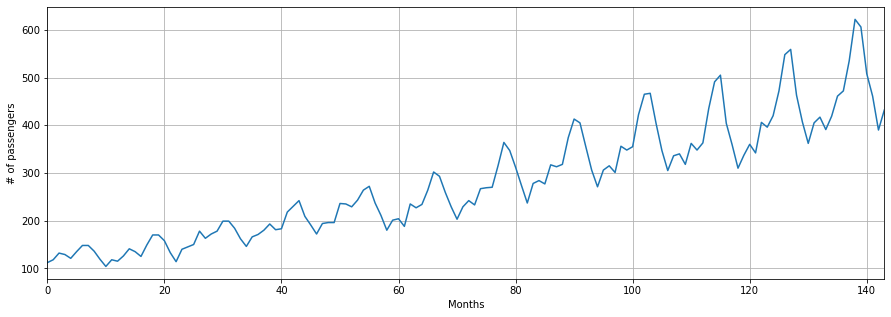

In [3]:
plt.figure(figsize=(15,5))
plt.xlabel("Months")
plt.ylabel("# of passengers")
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.show

# 数据预处理

In [4]:
all_data = flight_data['passengers'].values.astype(float)

test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)


In [6]:

def create_inout_sequences(input_data, tw=10):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

train_window = 12
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)


# 构建模型

In [7]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        if type(input_seq) is np.ndarray:
            input_seq = torch.from_numpy(input_seq).to(torch.float32)
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [8]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [9]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


# 训练模型

In [10]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)
        labels = torch.FloatTensor(labels)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size

In [126]:
t = torch.FloatTensor([[1],[2],[3]])
print(t.shape)
t.view(len(t), 1, -1)

torch.Size([3, 1])


tensor([[[1.]],

        [[2.]],

        [[3.]]])

# 预测

In [127]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].reshape(-1).tolist()
print(test_inputs)

[0.12527473270893097, 0.04615384712815285, 0.3274725377559662, 0.2835164964199066, 0.3890109956264496, 0.6175824403762817, 0.9516483545303345, 1.0, 0.5780220031738281, 0.33186814188957214, 0.13406594097614288, 0.32307693362236023]


In [128]:
model.eval()


for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())
        actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))


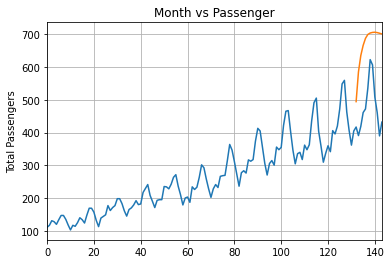

In [130]:
x = np.arange(132, 144, 1)


plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(x, actual_predictions)
plt.show()

In [132]:
lstm = nn.LSTM(3, 3)

In [153]:
lstm = nn.LSTM(input_size=10, hidden_size=20, num_layers=3)#(input_size,hidden_size,num_layers)
input = torch.randn(5, 3, 10)#(seq_len, batch, input_size)
h0 = torch.randn(3, 3, 20) #(num_layers,batch,output_size)
c0 = torch.randn(3, 3, 20) #(num_layers,batch,output_size)
pred, (hn, cn) = lstm(input, (h0, c0))

# playground

In [156]:
df = pd.read_csv("/Users/renzhiqiang/Workspace/data/iops-kpi/train.csv")

In [164]:
kpi=df[df["KPI ID"]=='02e99bd4f6cfb33f']

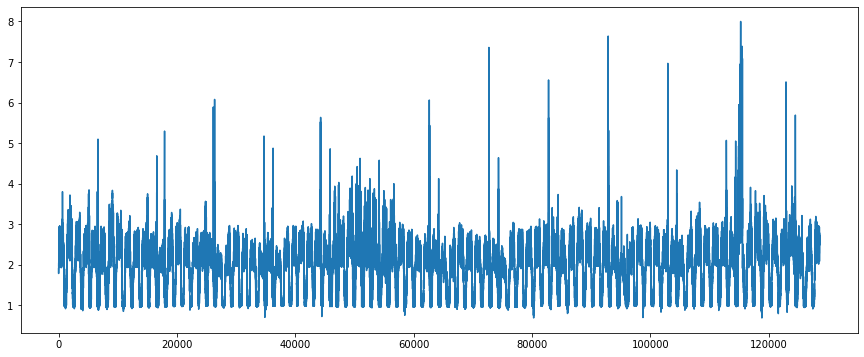

In [168]:
plt.figure(figsize=(15, 6))
plt.plot(kpi['value'])
plt.show()

In [169]:
ts = kpi['value']

In [171]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(ts.values .reshape(-1, 1))
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [185]:
window_size = 120
def create_inout_sequences(input_data, tw=10):
    X_seq = []
    y_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        X_seq.append(train_seq)
        y_seq.append(train_label)
    return np.array(X_seq), np.array(y_seq)
X,y = create_inout_sequences(ts.tolist(), window_size)

In [195]:
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y
           
    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return len(self.X) 

data_train = TimeSeriesDataset(X, y)
data_loader_train = DataLoader(data_train, batch_size=20, shuffle=False)


In [197]:
class LSTMPredict(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMPredict, self).__init__()
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=2, batch_first=True)
        self.hidden_out = nn.Linnear(hidden_size, 1)
        
        self.h_s = None
        self.h_c = None
        
    def forward(self, x):
        r_out, (h_s, h_c) = self.lstm(x)
        output = self.hidden_out(r_out)
        return output
        


In [200]:
data=X[:1000]

In [203]:
train_data_normalized.shape

torch.Size([128562])